<a href="https://colab.research.google.com/github/Mrinal7862/Simple-Linear-Regression-1/blob/main/slr_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
#reading the data
df = pd.read_csv("/content/height-weight.csv")

In [7]:


df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'height')

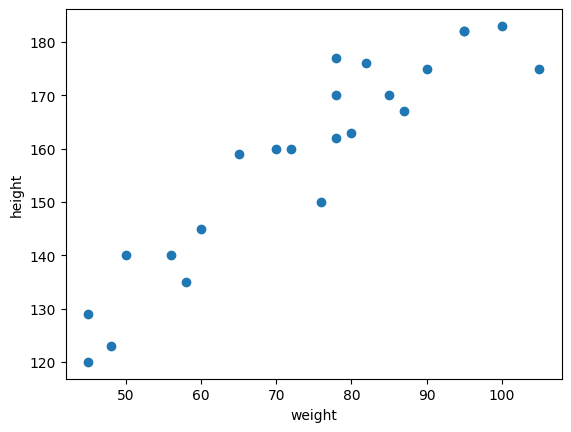

In [12]:
plt.scatter(df.Weight, df.Height)
plt.xlabel("weight")
plt.ylabel("height")

In [14]:
#Divide the data into x and y x=> Independant variable and y => Dependent variable

X= df[['Weight']] #Independant feature
y = df[['Height']] #Dependant Feature


In [15]:
# Split the data into train test, spli

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [17]:
X_train

,Weight
13,100
22,72
16,50
8,95
6,80
17,65
4,70
2,48
5,78
18,76


In [18]:
y_train

,Height
13,183
22,160
16,140
8,182
6,163
17,159
4,160
2,123
5,162
18,150


In [20]:
X_train.shape, y_train.shape, y_test.shape, X_test.shape

((17, 1), (17, 1), (6, 1), (6, 1))

In [21]:
df.shape

(23, 2)

In [22]:
#Scaling >> Use Standardazition >> fit_transfrom on train, and transorm on test

In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:
scaler = StandardScaler()

In [26]:
# Always perform scaling after train test and split
# y/target variable should not be scaled
# avoid scaling categorical features

X_train = scaler.fit_transform(X_train) # for train data use fit transform
X_test = scaler.transform(X_test) # for test data use transform


In [27]:
# model training
from sklearn.linear_model import LinearRegression

#Linear Regression  parameters
#fit_intercept >> The best fit line will have intercept by default it is true
#Copy_X >> By default it is true copies original X_train data and then build the model, data
#n_jobs >> How many processors you want to use
#positive >> you want all  of your coefficient to be positive
#After building you have attributes and coef
#intercept


In [29]:
regressor = LinearRegression()

In [30]:
regressor

LinearRegression()

In [32]:
# training of the model
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
print("The slope or coef of model is", regressor.coef_)
print("The intercept of model is", regressor.intercept_)

The slope or coef of model is [[16.53415595]]
The intercept of model is [159.47058824]


# Prediction on Train Data
## predicted height  = intercept + coef_(weights)
### y_pred_train = 160 + 17.74*(X_train)

# Prediction on Test data
## predicted height  = intercept + coef_(weights)
### y_pred_train = 160 + 17.74*(X_test)

array([[183.55673893],
       [156.45270174],
       [135.15667252],
       [178.71673229],
       [164.19671237],
       [149.67669244],
       [154.51669908],
       [133.22066986],
       [162.26070971],
       [160.32470705],
       [162.26070971],
       [173.87672565],
       [170.97272167],
       [144.8366858 ],
       [130.31666588],
       [162.26070971],
       [188.39674558]])

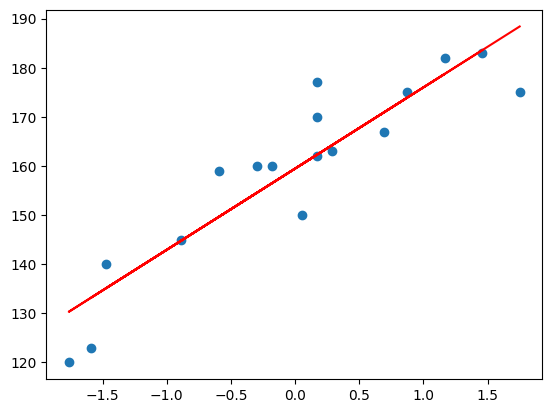

In [39]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')

In [40]:
y_pred_tes = regressor.predict(X_test)

In [41]:
y_pred_tes, y_test

(array([[178.71673229],
        [166.13271502],
        [140.96468049],
        [169.03671901],
        [130.31666588],
        [142.90068314]]),
     Height
 11     182
 10     176
 21     140
 14     170
 20     129
 1      135)

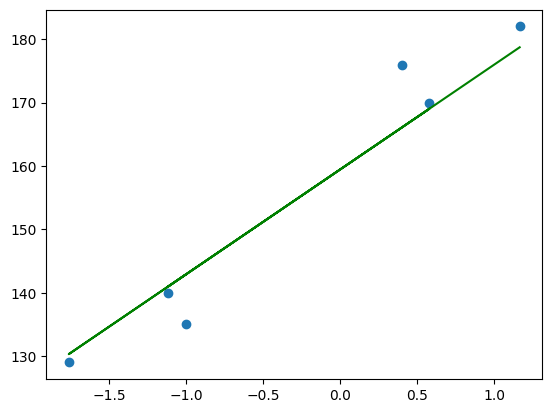

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), color='green')

In [43]:
# Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [57]:
mse = mean_squared_error(y_test, y_pred_tes)
mae = mean_squared_error(y_test, y_pred_tes)
mse = mean_squared_error(y_test, y_pred_tes)
mae = mean_squared_error(y_test, y_pred_tes)
rmse = np.sqrt(mse)

print(round(mse, 4), round(mae, 4), round(rmse, 4))

29.026 29.026 5.3876


In [62]:
# RSquare = 1-SSR/SST

In [65]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_tes)

In [66]:
#adjusted R Square
# R2 = 1 - [(1-R2)* (n-1)/(n-k-1)] #n is the no. of observation, k is the number of predictor variables

In [72]:
1 - ((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
#Always be lesser  than rsquare

0.9192325864861063

In [71]:
# to get no. of   columns

1

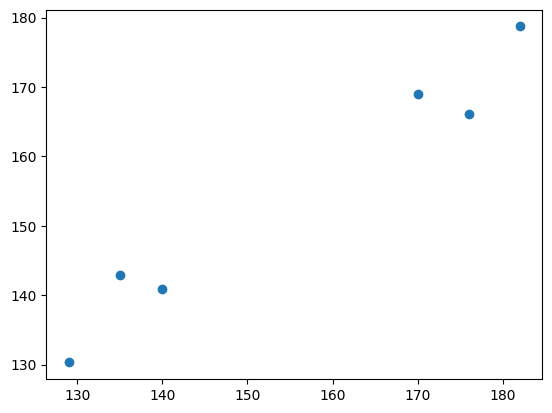

In [74]:
#assumption
#X-y should have linear relationship
# Observation should have no relation
# error should have constant variance
#error should be normally distribute
plt.scatter(y_test, y_pred_tes)

In [76]:
#To calculate the error and residual
error = y_test-y_pred_tes

In [77]:
error

,Height
11,3.283268
10,9.867285
21,-0.964680
14,0.963281
20,-1.316666
1,-7.900683


<Axes: ylabel='Density'>

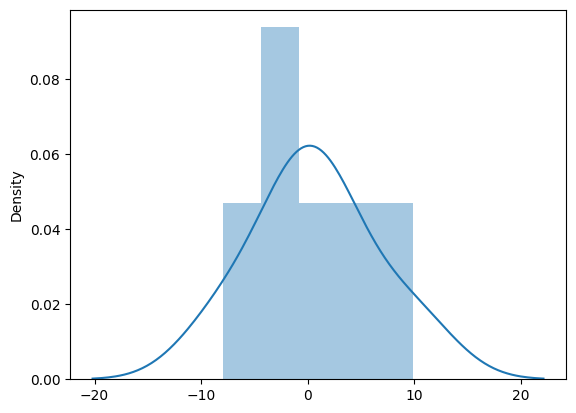

In [79]:
sns.distplot(error, kde=True)

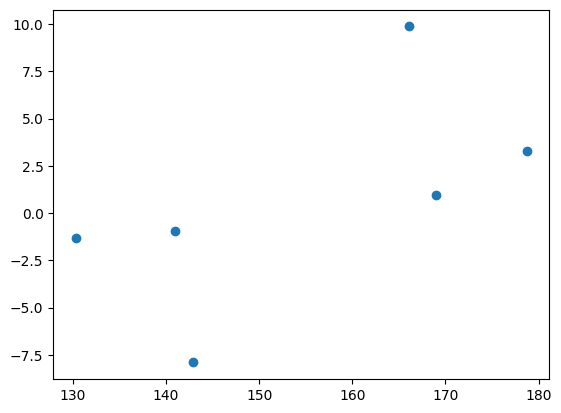

In [82]:
# error should have constant variance
plt.scatter(y_pred_tes, error)